In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("seaborn")
import plotly.graph_objects as go
from plotly.subplots import make_subplots


C:\Users\Kamir\AppData\Local\Temp\ipykernel_10808\324813220.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv("immobilier_france.csv")

In [73]:
departement = data[data["ville"]=="GRENOBLE"]

# Data processing 


In [63]:
departement.shape


(36071, 23)

In [64]:
departement.isnull().sum()


Unnamed: 0                    0
id_transaction                0
date_transaction              0
prix                          0
departement                   0
id_ville                      0
ville                         0
code_postal                   0
adresse                       0
type_batiment                 0
vefa                          0
n_pieces                      0
surface_habitable             0
id_parcelle_cadastre          0
latitude                      0
longitude                     0
surface_dependances           0
surface_locaux_industriels    0
surface_terrains_agricoles    0
surface_terrains_sols         0
surface_terrains_nature       0
surface_totale                0
prix_m2                       0
dtype: int64

In [6]:
departement.dtypes


Unnamed: 0                      int64
id_transaction                  int64
date_transaction               object
prix                          float64
departement                     int64
id_ville                        int64
ville                          object
code_postal                     int64
adresse                        object
type_batiment                  object
vefa                             bool
n_pieces                        int64
surface_habitable               int64
id_parcelle_cadastre           object
latitude                      float64
longitude                     float64
surface_dependances           float64
surface_locaux_industriels    float64
surface_terrains_agricoles    float64
surface_terrains_sols         float64
surface_terrains_nature       float64
surface_totale                float64
prix_m2                       float64
dtype: object

In [7]:
departement.nunique()


Unnamed: 0                    139713
id_transaction                139713
date_transaction                2745
prix                           18284
departement                        1
id_ville                         345
ville                            357
code_postal                       80
adresse                        77311
type_batiment                      2
vefa                               2
n_pieces                          22
surface_habitable                400
id_parcelle_cadastre           79143
latitude                       79097
longitude                      79097
surface_dependances                6
surface_locaux_industriels       450
surface_terrains_agricoles      3739
surface_terrains_sols           3380
surface_terrains_nature          716
surface_totale                  9073
prix_m2                        81851
dtype: int64

In [ ]:
surface_locaux_industriels       452 5%
surface_terrains_agricoles      3758 20%
surface_terrains_sols           3385 20%
surface_terrains_nature          723 5%
surface_totale                  5834 50%

In [65]:
print(departement['surface_habitable'].value_counts(),'\n', departement['n_pieces'].value_counts(),'\n', departement['code_postal'].value_counts(),'\n', departement['type_batiment'].value_counts())


65     843
45     777
48     758
70     746
50     686
      ... 
246      1
570      1
282      1
421      1
276      1
Name: surface_habitable, Length: 310, dtype: int64 
 2     10373
3      9081
4      6553
1      4803
5      3308
6      1065
7       450
8       171
0        95
9        89
10       38
11       23
13        9
12        8
14        3
28        1
15        1
Name: n_pieces, dtype: int64 
 59800    16322
59000    13487
59160     3720
59260     2362
59777      180
Name: code_postal, dtype: int64 
 Appartement    26088
Maison          9983
Name: type_batiment, dtype: int64


In [9]:
#from shapely.geometry import Point, Polygon

# Coordonnées de l'adresse
#adresse_coord = Point(48.131687, -1.692182)  # Exemple de coordonnées de Paris, France

# Définir les coordonnées du quartier lambda sous forme de polygone (exemple)
#quartier_lambda = Polygon([(-1.691197797465471, 48.133352271301035), (48.86, 2.35), (48.86, 2.36), (48.85, 2.36)])

# Vérifier si l'adresse se trouve à l'intérieur du quartier lambda
#appartient_au_quartier = adresse_coord.within(quartier_lambda)

#if appartient_au_quartier:
#    print("L'adresse appartient au quartier lambda.")
#else:
#    print("L'adresse n'appartient pas au quartier lambda.")


In [61]:
print(departement["n_pieces"].unique())


[]


# Analyse Macro

In [11]:
import requests
url = 'https://www.insee.fr/fr/statistiques/6688389#tableau-ipc-g1-fr'

# Envoyer une requête GET pour récupérer la page web
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Lire le tableau des données en utilisant pandas
    dfs = pd.read_html(response.text)
    # Supposons que le premier tableau contient les données d'inflation
    inflation_data = dfs[0]
    inflation_data.index=inflation_data["Unnamed: 0"]
    # Vous pouvez maintenant travailler avec les données d'inflation

else:
    print("Échec de la requête HTTP")

In [12]:
inflation_data.sort_index(inplace=True, ascending=True)


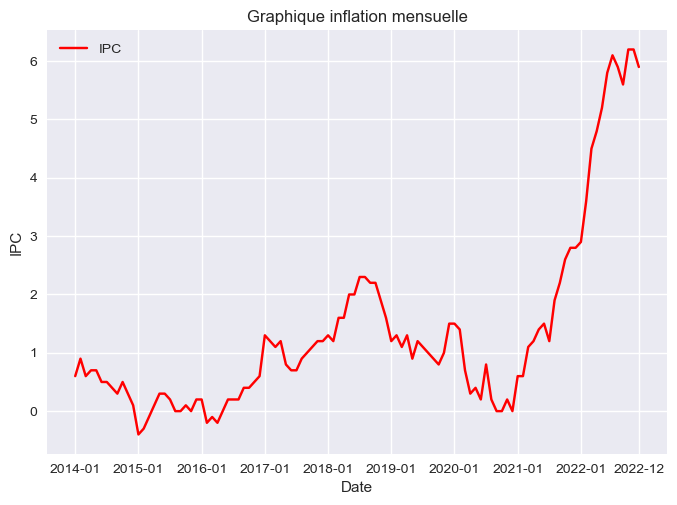

In [13]:
import matplotlib.pyplot as plt

# Remplace 'Date' par le nom correct de ta colonne de dates
plt.plot(inflation_data['Unnamed: 0'], inflation_data['IPC'], label='IPC', color='red')

# Choisis les emplacements des marques sur l'axe des x
plt.xticks(['2014-01', '2015-01', '2016-01', '2017-01', '2018-01',"2019-01","2020-01","2021-01","2022-01","2022-12"])

plt.legend()
plt.title('Graphique inflation mensuelle')
plt.xlabel('Date')
plt.ylabel('IPC')

plt.show()


In [14]:
tx_directeur = pd.read_csv("ECB tx directeur.csv",parse_dates=["DATE"],index_col="DATE")
tx_directeur.index = pd.to_datetime(tx_directeur.index)
tx_directeur= tx_directeur[(tx_directeur.index >= '2014-01-01') & (tx_directeur.index <= '2023-12-31')]


In [15]:
#tx_directeur = tx_directeur.resample('M').mean()


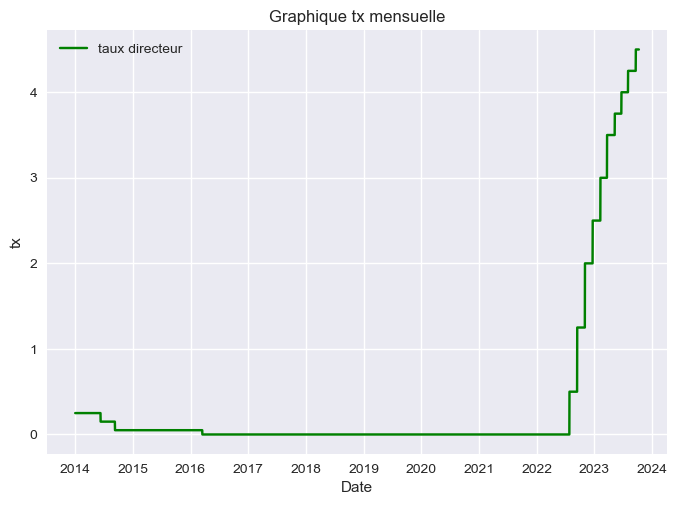

In [16]:
import matplotlib.pyplot as plt

# Remplace 'Date' par le nom correct de ta colonne de dates
plt.plot(tx_directeur.index, tx_directeur['ECB Main refinancing operations - fixed rate tenders (fixed rate) (date of changes) - Level (FM.D.U2.EUR.4F.KR.MRR_FR.LEV)'], label='taux directeur', color='green')

# Choisis les emplacements des marques sur l'axe des x

plt.legend()
plt.title('Graphique tx mensuelle')
plt.xlabel('Date')
plt.ylabel('tx')

plt.show()


# Analyse du département

In [75]:
departement

Unnamed: 0  id_transaction date_transaction          prix  \
2703264     2766520         4861917       2014-01-02  62000.000000   
2703266     2766522         4861020       2014-01-02 168000.000000   
2703273     2766529         4870584       2014-01-02  74000.000000   
2703281     2766537         4876257       2014-01-03  67560.000000   
2703285     2766541         4859867       2014-01-03  95000.000000   
...             ...             ...              ...           ...   
2846303     2913269         4243673       2022-12-30 115000.000000   
2846306     2913272         4246333       2022-12-30  52500.000000   
2846308     2913274         4238934       2022-12-30 166250.000000   
2846316     2913282         4237992       2022-12-30 136880.000000   
2846318     2913284         4240530       2022-12-30 192000.000000   

         departement  id_ville     ville  code_postal  \
2703264           38       185  GRENOBLE        38000   
2703266           38       185  GRENOBLE        38000   
2703273           38       185  GRENOBLE        38000   
2703281           38       185  GRENOBLE        38100   
2703285           38       185  GRENOBLE        38100   
...              ...       ...       ...          ...   
2846303           38       185  GRENOBLE        38100   
2846306           38       185  GRENOBLE        38100   
2846308           38       185  GRENOBLE        38100   
2846316           38       185  GRENOBLE        38100   
2846318           38       185  GRENOBLE        38000   

                          adresse type_batiment  ...  id_parcelle_cadastre  \
2703264         22 BD MAL LECLERC   Appartement  ...        38185000BX0003   
2703266  1 RUE DU GENERAL JANSSEN   Appartement  ...        38185000DK0047   
2703273          7 PL JEAN MOULIN   Appartement  ...        38185000BY0030   
2703281          3 RUE ANDRE ABRY   Appartement  ...        38185000HN0023   
2703285             2 AV BEAUVERT   Appartement  ...        38185000HN0106   
...                           ...           ...  ...                   ...   
2846303      20 RUE ANDRE RIVOIRE   Appartement  ...        38185000HV0115   
2846306        59 AV JEANNE D ARC   Appartement  ...        38185000CZ0112   
2846308           22 AV LEON BLUM   Appartement  ...        38185000HN0066   
2846316            4 AV LEON BLUM   Appartement  ...        38185000EO0085   
2846318         16 RUE COL DUMONT   Appartement  ...        38185000DI0092   

         latitude  longitude surface_dependances  surface_locaux_industriels  \
2703264 45.193855   5.734645            0.000000                    0.000000   
2703266 45.181279   5.718305            0.000000                    0.000000   
2703273 45.189816   5.736919            0.000000                    0.000000   
2703281 45.168208   5.713463            0.000000                    0.000000   
2703285 45.167276   5.713546            0.000000                    0.000000   
...           ...        ...                 ...                         ...   
2846303 45.177856   5.713283            0.000000                    0.000000   
2846306 45.182187   5.744863            0.000000                    0.000000   
2846308 45.168718   5.721416            0.000000                    0.000000   
2846316 45.169630   5.721926            0.000000                    0.000000   
2846318 45.181507   5.720769            0.000000                    0.000000   

         surface_terrains_agricoles  surface_terrains_sols  \
2703264                    0.000000               0.000000   
2703266                    0.000000               0.000000   
2703273                    0.000000               0.000000   
2703281                    0.000000               0.000000   
2703285                    0.000000               0.000000   
...                             ...                    ...   
2846303                    0.000000               0.000000   
2846306                    0.000000               0.000000   
2846308                    

In [76]:
departement.index=departement["date_transaction"]

In [77]:
departement['date_transaction'] = pd.to_datetime(departement['date_transaction'])
departement['annee_mois'] = departement['date_transaction'].dt.strftime('%Y-%m')
volume = departement.groupby('annee_mois').size().reset_index(name='Volume de transaction/mois')
departement = pd.merge(departement, volume, on='annee_mois', how='right')

C:\Users\Kamir\AppData\Local\Temp\ipykernel_15416\3666333448.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kamir\AppData\Local\Temp\ipykernel_15416\3666333448.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
resultat = departement.groupby('annee_mois')['prix_m2'].mean().reset_index()
departement = pd.merge(departement, resultat, on='annee_mois', how='right')
departement = departement.rename(columns={'prix_m2_y': 'moy prix m²/mois'})
departement = departement.rename(columns={'prix_m2_x': 'prix_m2'})

In [21]:
#departement = departement.drop(["surface_dependances","surface_locaux_industriels","surface_terrains_agricoles","surface_terrains_sols","surface_terrains_nature"],axis=1)


In [79]:
departement["prix_m2"].mean()

4805.512990738291

In [74]:


# Centre et réduit la colonne "prix"
departement['prix_centre_reduit'] = (departement['prix'] - departement['prix'].mean()) / departement['prix'].std()
departement

Unnamed: 0  id_transaction date_transaction          prix  \
0          2523639         4830623       2014-01-02  50000.000000   
1          2523640         4826227       2014-01-02 357000.000000   
2          2523641         4840520       2014-01-02 121000.000000   
3          2523642         4833510       2014-01-02  75000.000000   
4          2523643         4833296       2014-01-02  80000.000000   
...            ...             ...              ...           ...   
142907     2666546         4190534       2022-12-30 170000.000000   
142908     2666547         4189863       2022-12-30 295000.000000   
142909     2666548         4189662       2022-12-30 524000.000000   
142910     2666549         4205180       2022-12-30 278400.000000   
142911     2666550         4215579       2022-12-31  98400.000000   

        departement  id_ville              ville  code_postal  \
0                35       288         SAINT-MALO        35400   
1                35       238             RENNES        35000   
2                35       238             RENNES        35000   
3                35       127            GUIGNEN        35580   
4                35       339     TRANS-LA-FORET        35610   
...             ...       ...                ...          ...   
142907           35       319      SAINT-THURIAL        35310   
142908           35         1             ACIGNE        35690   
142909           35       288         SAINT-MALO        35400   
142910           35        33  BOURG-DES-COMPTES        35890   
142911           35       208            ORGERES        35230   

                          adresse type_batiment  ...  \
0       18 RUE MONTAGNE ST JOSEPH   Appartement  ...   
1                   23 RUE LESAGE   Appartement  ...   
2                   35 BD MARBEUF   Appartement  ...   
3                  50 RUE GICQUEL        Maison  ...   
4          5371  LA PETITE ABBAYE        Maison  ...   
...                           ...           ...  ...   
142907      10 RUE DES JEANNETTES        Maison  ...   
142908      22 RUE LOUIS GUILLOUX        Maison  ...   
142909              41 BD GOUAZON   Appartement  ...   
142910           11 RUE DES CLEUX        Maison  ...   
142911           47 RUE DE RENNES        Maison  ...   

        surface_locaux_industriels  surface_terrains_agricoles  \
0                         0.000000                    0.000000   
1                         0.000000                    0.000000   
2                         0.000000                    0.000000   
3                         0.000000                    0.000000   
4                         0.000000                   26.000000   
...                            ...                         ...   
142907                    0.000000                    0.000000   
142908                    0.000000                    0.000000   
142909                    0.000000                    0.000000   
142910                    0.000000                    0.000000   
142911                    0.000000                    0.000000   

        surface_terrains_sols surface_terrains_nature  surface_totale  \
0                    0.000000                0.000000       50.000000   
1                    0.000000                0.000000      129.000000   
2                    0.000000                0.000000       62.000000   
3                 1179.000000                0.000000     1284.000000   
4                 1032.000000                0.000000     1258.000000   
...                       ...                     ...             ...   
142907             969.000000                0.000000     1084.000000   
142908             240.000000                0.000000      324.000000   
142909               0.000000                0.000000       93.000000   
142910             713.000000                0.000000      827.000000   
142911             826.000000                0.000000      997.000000   

           prix_m2  annee_mois  Volume de transaction/m

In [24]:
#seuil_sup = departement['prix_m2'].quantile(0.9)
#departement=departement[departement['prix_m2'] < seuil_sup]

In [27]:
#ahmed=departement[departement['adresse'].str.contains('RUE PIERRE SEVRE')]
#result = ahmed[['date_transaction', 'prix', 'adresse', 'surface_habitable']]
#result

In [17]:
v=departement["Volume de transaction/mois"].unique()
np.median(v),v.mean()


(1282.0, 1297.0291262135922)

In [80]:
p=departement["moy prix m²/mois"].unique()
np.median(p),p.mean()

(4729.826561777689, 4813.028263318036)

In [19]:
resultat.index=resultat["annee_mois"]
resultat=resultat.drop("annee_mois",axis=1)
volume.index=volume["annee_mois"]
volume=volume.drop("annee_mois",axis=1)

In [20]:
resultat

prix_m2
annee_mois             
2014-01     3304.815500
2014-02     3260.703359
2014-03     3558.065992
2014-04     3368.750378
2014-05     3239.472317
...                 ...
2022-08     4225.259309
2022-09     4755.171863
2022-10     4497.717212
2022-11     4761.548613
2022-12     4709.648509

[108 rows x 1 columns]

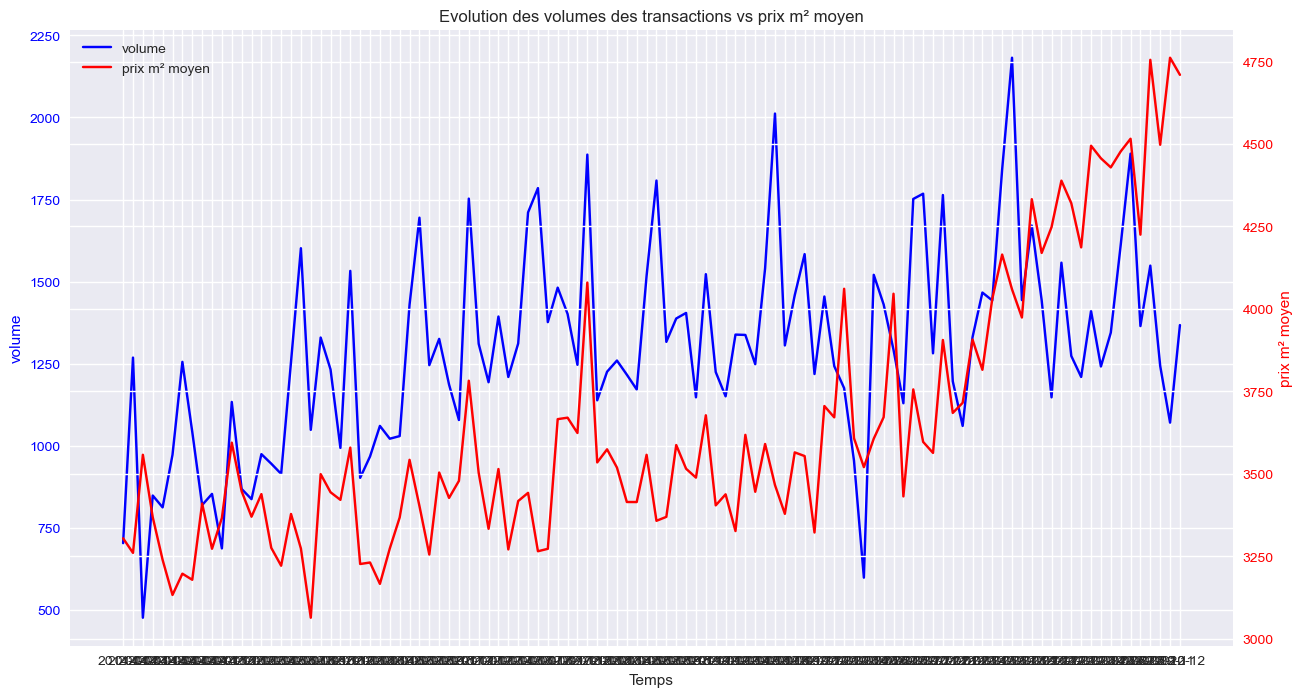

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(volume, color='b', label='volume')
ax1.set_xlabel('Temps')
ax1.set_ylabel('volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(resultat, color='r', label='prix m² moyen')
ax2.set_ylabel('prix m² moyen', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Evolution des volumes des transactions vs prix m² moyen')

plt.show()

In [22]:
import pandas as pd

#pour lisser les graphs
#resultat['prix_m2_smooth'] = resultat['prix_m2'].rolling(window=2).mean()
#volume['Volume de transaction/mois_smooth'] = volume['Volume de transaction/mois'].rolling(window=2).mean()

fig = make_subplots(specs=[[{"secondary_y": True}]])

#fig.add_trace(go.Scatter(x=resultat.index, y=resultat['prix_m2'], mode='lines', name='Prix lissé', line=dict(color='light green')), secondary_y=False)
fig.add_trace(go.Scatter(x=resultat.index, y=resultat['prix_m2'], mode='lines', name='Prix lissé', line=dict(color='light green'), connectgaps=True), secondary_y=False)

#fig.add_trace(go.Scatter(x=volume.index, y=volume['Volume de transaction/semaine'], mode='lines', name='Volume de transaction lissé', line=dict(color='pink')), secondary_y=True)
fig.add_trace(go.Scatter(x=volume.index, y=volume['Volume de transaction/mois'], mode='lines', name='Volume de transaction lissé', line=dict(color='pink'), connectgaps=True), secondary_y=True)

fig.update_layout(
    title='Graphique des volumes de transactions et prix m² moyen',
    xaxis=dict(title='Temps'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1100,  # Largeur de la figure en pixels
    height=600,  # Hauteur de la figure en pixels
    plot_bgcolor='light blue',  # Couleur de fond transparente
    paper_bgcolor='white',  # Couleur du papier transparente
    font=dict(color='black')
)

fig.show()


In [36]:
#relation inverse entre le volume des transactions et le prix moy du m2
#On remarque une saisonalité, les prix baissent entre février et Mai, le volume de transaction explose en Juillet

In [23]:
resultat["variation"]=(resultat["prix_m2"]-resultat["prix_m2"].shift())/resultat["prix_m2"].shift()

In [24]:
volume["variation"]=(volume["Volume de transaction/mois"]-volume["Volume de transaction/mois"].shift())/volume["Volume de transaction/mois"].shift()

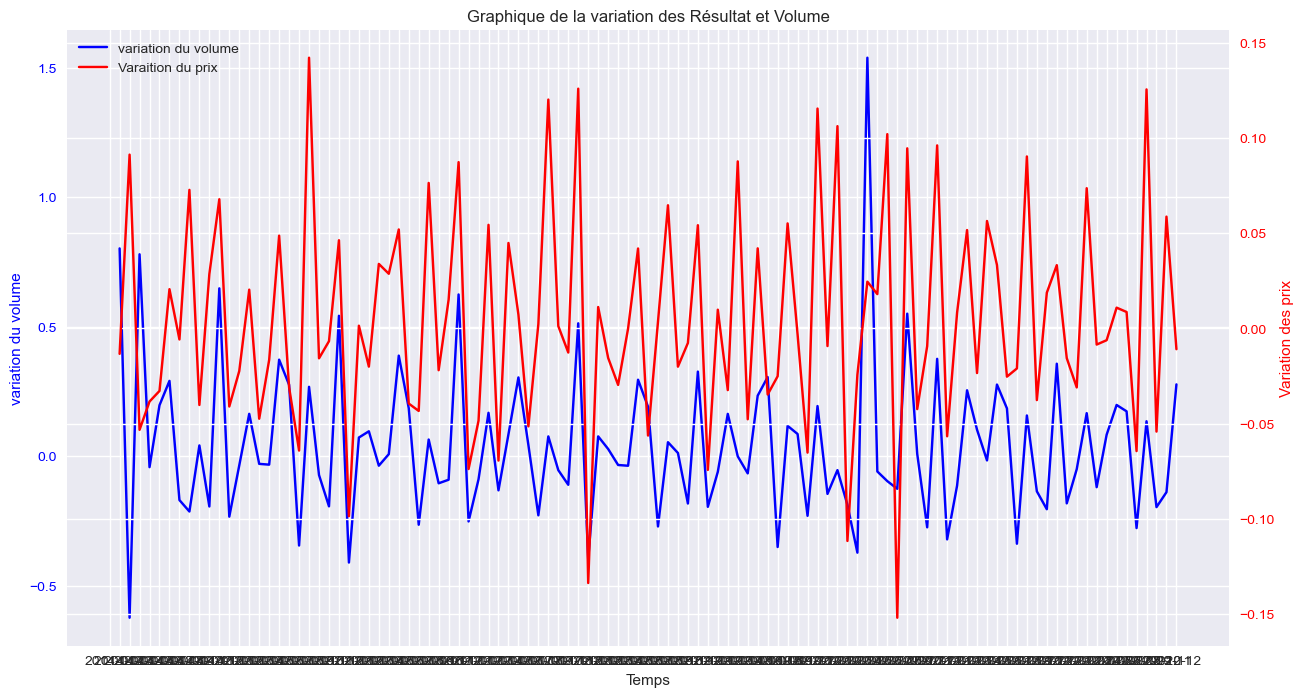

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(volume.variation, color='b', label='variation du volume')
ax1.set_xlabel('Temps')
ax1.set_ylabel('variation du volume', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(resultat.variation, color='r', label='Varaition du prix')
ax2.set_ylabel('Variation des prix', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Graphique de la variation des Résultat et Volume')

plt.show()



In [41]:
resultat["sma_4"]=resultat["prix_m2"].rolling(4).mean()
resultat["sma_12"]=resultat["prix_m2"].rolling(12).mean()
resultat["sma4-sma12"]=resultat["sma_4"]-resultat["sma_12"]
resultat["position"]=np.where(resultat["sma_4"]>resultat["sma_12"],1,-1)


In [27]:
volume["sma_4"]=volume["Volume de transaction/mois"].rolling(4).mean()
volume["sma_12"]=volume["Volume de transaction/mois"].rolling(12).mean()
volume["position"]=np.where(volume["sma_4"]>resultat["sma_12"],1,-1)

In [42]:
resultat.dropna()

prix_m2  variation       sma_4      sma_12  position  \
annee_mois                                                            
2014-12    3594.777825   0.067783 3411.231765 3323.900363         1   
2015-01    3447.493113  -0.040972 3420.531982 3335.790164         1   
2015-02    3370.367896  -0.022371 3444.805186 3344.928876         1   
2015-03    3438.893796   0.020332 3462.883158 3334.997860         1   
2015-04    3275.922718  -0.047391 3383.169381 3327.262221         1   
...                ...        ...         ...         ...       ...   
2022-08    4225.259309  -0.064370 4411.932263 4353.830372         1   
2022-09    4755.171863   0.125415 4493.442833 4389.027951         1   
2022-10    4497.717212  -0.054142 4498.525361 4416.351890         1   
2022-11    4761.548613   0.058659 4559.924249 4459.147624         1   
2022-12    4709.648509  -0.010900 4681.021549 4485.870922         1   

            sma12-sma4  sma4-sma12  
annee_mois                          
2014-12     -87.331401   87.331401  
2015-01     -84.741818   84.741818  
2015-02     -99.876310   99.876310  
2015-03    -127.885298  127.885298  
2015-04     -55.907160   55.907160  
...                ...         ...  
2022-08     -58.101891   58.101891  
2022-09    -104.414882  104.414882  
2022-10     -82.173472   82.173472  
2022-11    -100.776626  100.776626  
2022-12    -195.150627  195.150627  

[97 rows x 7 columns]

In [29]:
volume.dropna()

Volume de transaction/mois  variation    sma_4       sma_12  \
annee_mois                                                                
2014-12                           1134   0.648256   874.00   906.666667   
2015-01                            869  -0.233686   886.25   920.416667   
2015-02                            838  -0.035673   882.25   884.500000   
2015-03                            975   0.163484   954.00   926.000000   
2015-04                            946  -0.029744   907.00   934.083333   
...                                ...        ...      ...          ...   
2022-08                           1365  -0.277778  1552.75  1430.750000   
2022-09                           1549   0.134799  1603.75  1420.583333   
2022-10                           1244  -0.196901  1512.00  1403.916667   
2022-11                           1071  -0.139068  1307.25  1397.500000   
2022-12                           1368   0.277311  1308.00  1381.666667   

            position  
annee_mois            
2014-12           -1  
2015-01           -1  
2015-02           -1  
2015-03           -1  
2015-04           -1  
...              ...  
2022-08           -1  
2022-09           -1  
2022-10           -1  
2022-11           -1  
2022-12           -1  

[97 rows x 5 columns]

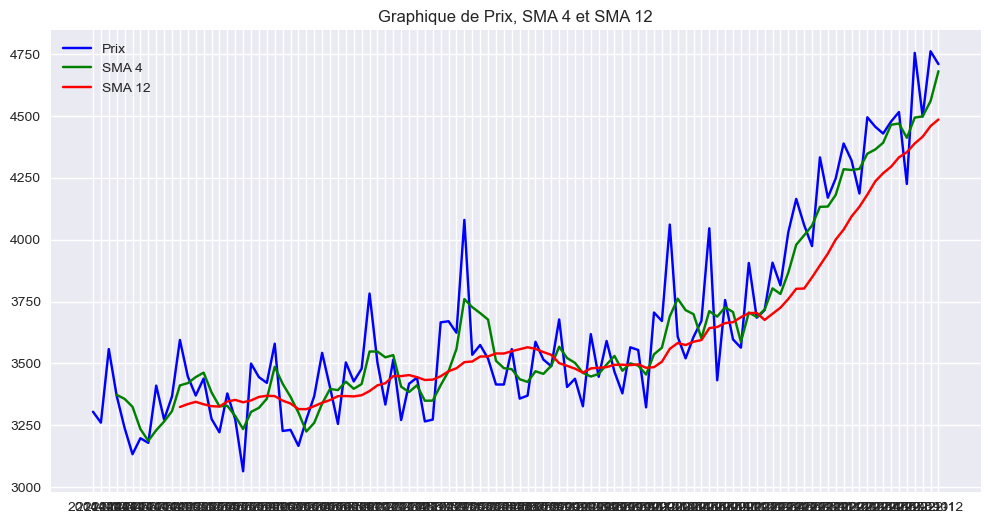

In [30]:

plt.figure(figsize=(12, 6))

plt.plot(resultat["prix_m2"], label='Prix', color='blue')

plt.plot(resultat.sma_4, label='SMA 4', color='green')

plt.plot(resultat.sma_12, label='SMA 12', color='red')

plt.legend()

plt.title('Graphique de Prix, SMA 4 et SMA 12')

plt.show()


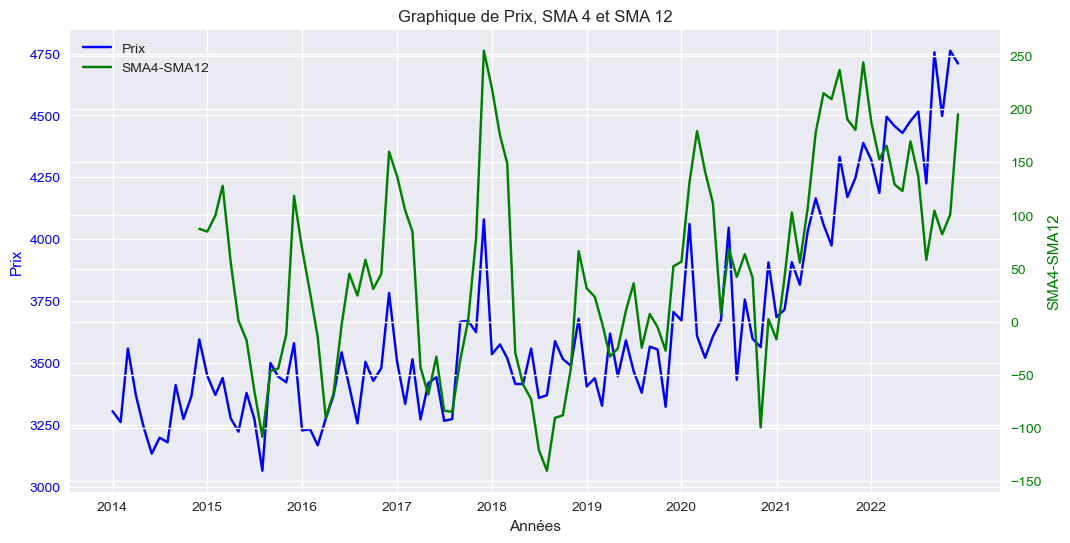

In [49]:
import matplotlib.pyplot as plt

# Créer une figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer la première série de données (Prix)
ax1.plot(resultat.index, resultat["prix_m2"], label='Prix', color='blue')
ax1.set_xlabel('Années')  # Définir le label de l'axe des abscisses
ax1.set_ylabel('Prix', color='blue')  # Définir le label et la couleur de l'axe des ordonnées
ax1.tick_params(axis='y', labelcolor='blue')  # Définir la couleur des ticks sur l'axe des ordonnées

# Créer un deuxième axe y partageant le même axe x
ax2 = ax1.twinx()
ax2.plot(resultat.index, resultat["sma4-sma12"], label='SMA4-SMA12', color='green')
ax2.set_ylabel('SMA4-SMA12', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Ajouter une légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Ajouter un titre
plt.title('Graphique de Prix, SMA 4 et SMA 12')

# Définir les positions et les étiquettes des ticks sur l'axe x (début de chaque année)
plt.xticks(resultat.index[resultat.index.month == 1], [str(year.year) for year in resultat.index[resultat.index.month == 1]])

# Afficher le graphique
plt.show()


In [31]:

# Supposons que 'resultat' soit un DataFrame pandas contenant vos données

# Créer une figure
fig = go.Figure()

# Ajouter une trace pour le prix
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["prix_m2"], mode='lines', name='Prix', line=dict(color='light green')))

# Ajouter une trace pour SMA 7
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["sma_4"], mode='lines', name='prix m² / 4m', line=dict(color='yellow')))

# Ajouter une trace pour SMA 20
fig.add_trace(go.Scatter(x=resultat.index, y=resultat["sma_12"], mode='lines', name='prix m²/12m', line=dict(color='light blue')))

# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Graphique de Prix, prix m²/4m et prix m²/12m',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1000,  # Largeur de la figure en pixels
    height=600,   # Hauteur de la figure en pixels
    plot_bgcolor='light blue',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Afficher le graphique
fig.show()


In [32]:


# Supposons que 'resultat' soit un DataFrame pandas contenant vos données

# Créer une figure
fig = go.Figure()

# Ajouter une trace pour le prix
fig.add_trace(go.Scatter(x=volume.index, y=volume["Volume de transaction/mois"], mode='lines', name='volume des transactions', line=dict(color='light green')))

# Ajouter une trace pour SMA 7
fig.add_trace(go.Scatter(x=volume.index, y=volume["sma_4"], mode='lines', name='volume moy /4m', line=dict(color='yellow')))

# Ajouter une trace pour SMA 20
fig.add_trace(go.Scatter(x=volume.index, y=volume["sma_12"], mode='lines', name='volume moy/12m', line=dict(color='light blue')))

# Personnaliser la mise en page du graphique
fig.update_layout(
    title='Graphique de Volume de transaction, volume moy/4m et volume moy/12m',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Valeur'),
    legend=dict(x=0, y=1),
    showlegend=True,
    autosize=True,
    width=1000,  # Largeur de la figure en pixels
    height=600,   # Hauteur de la figure en pixels
    plot_bgcolor='light blue',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Afficher le graphique
fig.show()

In [33]:
volume.dropna()

Volume de transaction/mois  variation    sma_4       sma_12  \
annee_mois                                                                
2014-12                           1134   0.648256   874.00   906.666667   
2015-01                            869  -0.233686   886.25   920.416667   
2015-02                            838  -0.035673   882.25   884.500000   
2015-03                            975   0.163484   954.00   926.000000   
2015-04                            946  -0.029744   907.00   934.083333   
...                                ...        ...      ...          ...   
2022-08                           1365  -0.277778  1552.75  1430.750000   
2022-09                           1549   0.134799  1603.75  1420.583333   
2022-10                           1244  -0.196901  1512.00  1403.916667   
2022-11                           1071  -0.139068  1307.25  1397.500000   
2022-12                           1368   0.277311  1308.00  1381.666667   

            position  
annee_mois            
2014-12           -1  
2015-01           -1  
2015-02           -1  
2015-03           -1  
2015-04           -1  
...              ...  
2022-08           -1  
2022-09           -1  
2022-10           -1  
2022-11           -1  
2022-12           -1  

[97 rows x 5 columns]

In [34]:
colonnes_selectionnees = ['surface_habitable', 'n_pieces','prix_m2']
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

departement[colonnes_selectionnees].describe()


surface_habitable      n_pieces       prix_m2
count      139713.000000 139713.000000 139713.000000
mean           86.291204      3.735944   3679.114470
std            41.675952      1.583180   3862.065708
min             4.000000      0.000000      2.954967
25%            59.000000      3.000000   1356.017643
50%            79.000000      4.000000   3232.421875
75%           108.000000      5.000000   5333.333333
max          1528.000000     32.000000 683076.923077

<Axes: xlabel='surface_habitable', ylabel='Count'>

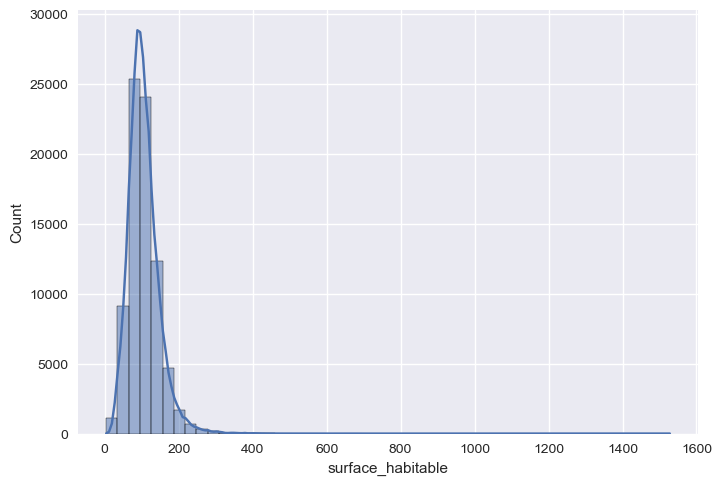

In [35]:
sns.histplot(x=departement.loc[departement["type_batiment"] == "Maison", 'surface_habitable'], kde=True, bins=50)


In [50]:
sns.histplot((x = departement.loc[departement["type_batiment"] = "Maison"]).['surface_habitable'],  kde = True, bins = 50).set_title('surface habitable')


SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (1877233110.py, line 1)

Text(0.5, 1.0, 'Nombre de pièces')

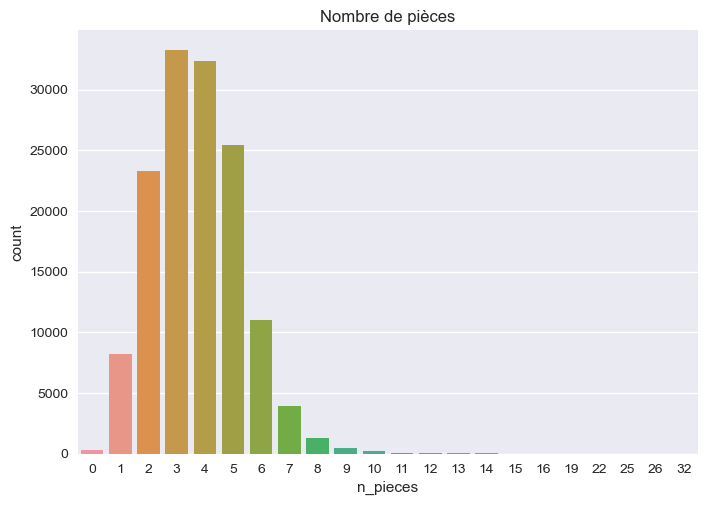

In [36]:
sns.countplot(x = 'n_pieces', data = departement).set_title('Nombre de pièces')


Text(0.5, 1.0, 'Nombre de pièces')

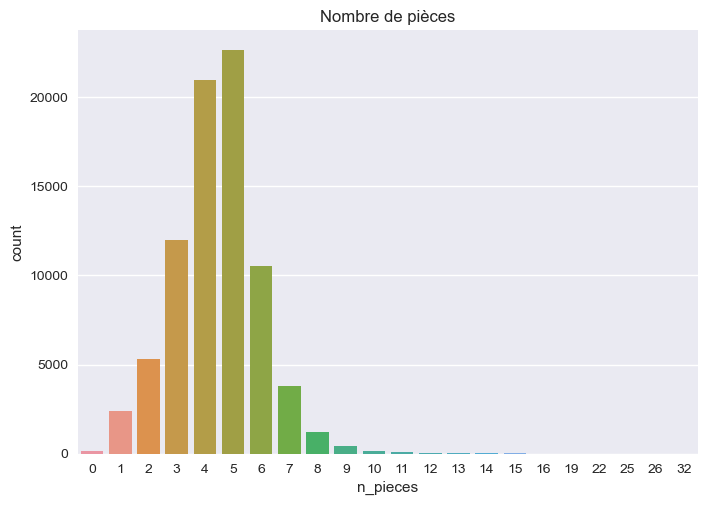

In [37]:
sns.countplot(x = 'n_pieces', data = departement.loc[departement["type_batiment"] == "Maison"]).set_title('Nombre de pièces')


Text(0.5, 1.0, 'Nature du bien')

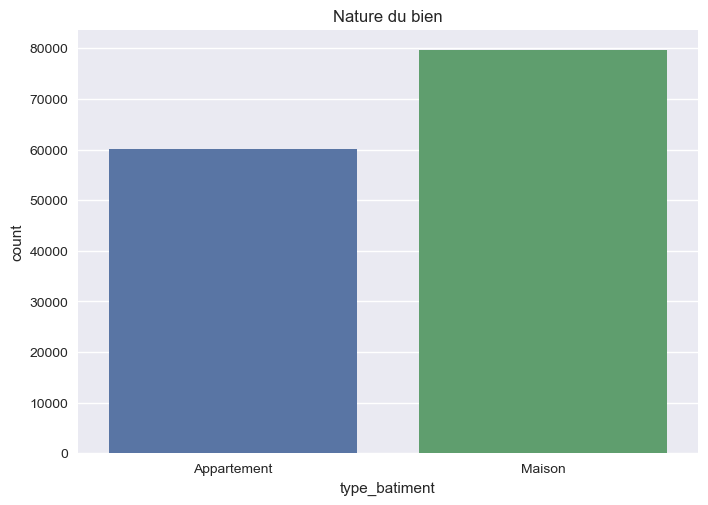

In [38]:
sns.countplot(x='type_batiment',data=departement).set_title('Nature du bien')


In [ ]:
data1 = data[data["departement"]==75]

In [ ]:
data1.index=data1["date_transaction"]

In [ ]:
data1 = data1.drop(["surface_dependances","surface_locaux_industriels","surface_terrains_agricoles","surface_terrains_sols","surface_terrains_nature"],axis=1)



In [ ]:
appartement = departement[departement["type_batiment"] == "Appartement"]


In [ ]:
appartement['date_transaction'] = pd.to_datetime(appartement['date_transaction'])
appartement['annee_mois'] = appartement['date_transaction'].dt.strftime('%Y-%m')
volume_appartement = departement.groupby('annee_mois').size().reset_index(name='Volume de transaction/mois')
departement = pd.merge(departement, volume_appartement, on='annee_mois', how='right')

In [ ]:
sns.scatterplot(x = 'surface_habitable', y = 'prix', data = departement)


In [ ]:
sns.scatterplot(x = 'surface_habitable', y = 'prix', data = departement.loc[departement["type_batiment"] == "Appartement"])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créez la boîte à moustaches (boxplot)
plt.figure(figsize=(12, 6))  # Définissez la taille de la figure
sns.boxplot(x='n_pieces', y='prix_m2', data=departement)
plt.title('Nombre de pièces vs Prix')

# Affichez le graphe
plt.show()


In [ ]:
import plotly.express as px

# Supposons que vous ayez un DataFrame appelé 'data' avec les colonnes 'ville', 'ventes' et des données géographiques
# Assurez-vous d'avoir les données géographiques appropriées, par exemple les coordonnées géographiques des villes.

fig = px.scatter_geo(departement, 
                     locations="Ville", 
                     color="Volume de transaction/mois",
                     size="Volume de transaction/mois",
                     projection="natural earth",
                     title="Nombre de ventes de maisons par ville en France",
                     template="plotly",
                     color_continuous_scale="Viridis"
                    )

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="lightgray")

fig.show()
